The scraper for this project work

In [4]:
from bs4 import BeautifulSoup
import urllib
from pandas import Series, DataFrame
import pandas as pd
import numpy as np  
import re
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
import itertools
from sklearn import manifold
%pylab inline
import urllib.request

Populating the interactive namespace from numpy and matplotlib


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yanni\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
#define the function for scraping the pages
def PageToList(URL):
    print( URL)
    page = urllib.request.urlopen(URL).read()
    soup = BeautifulSoup(page)
    page_comments = soup.find_all("div", class_="Comment")
    for i in range(0,len(page_comments)):
        post_date = page_comments[i].find('time')['title']
        post_userid = page_comments[i].find("a", class_="Username").get_text().encode('utf-8').strip()
        post_message = page_comments[i].find("div", class_="Message").get_text().encode('utf-8').strip()

        comment_tuple = [post_date,post_userid,post_message]
        Results_list.append(comment_tuple)
    return

#initialize a list to hold the results
Results_list = []
#call the scraper for 250 pages of messages
for p in range(1,251):
    x = 'https://forums.edmunds.com/discussion/7526/general/x/midsize-sedans-2-0/p'+str(p)
    PageToList(x)

#Put the results into a dataframe and export to csv
Results_df = DataFrame(Results_list,columns=['Date','UserID','Message'])
Results_df.to_csv('hw2.csv')

https://forums.edmunds.com/discussion/7526/general/x/midsize-sedans-2-0/p1


HTTPError: HTTP Error 403: Forbidden

# Part A

In [3]:
brands = pd.ExcelFile('Cars make model list.xlsx')
brands_df = brands.parse('Models')
del brands_df['Unnamed: 0']
brands_df.columns = ['Make', 'Model']
brands_df = brands_df.dropna()
brands_df = brands_df.drop(brands_df.index[[0]])
brands_df = brands_df.reset_index()
del brands_df['index']
brands_df['Model'] = brands_df['Model'].str.lower()
brands_df['Make'] = brands_df['Make'].str.lower()
brands_df.head()

Make    Model
0  acura  integra
1  acura  legend 
2  acura    vigor
3  acura      rlx
4  acura      ilx

In [4]:
def ModelToMake(string):
    string = string.lower()
    for i in range(0,len(brands_df)):
        string = string.replace(brands_df.iloc[i]['Model'].encode('utf-8').strip(), brands_df.iloc[i]['Make'].encode('utf-8').strip(),1)
    return   string 
    
#teststring = "acura integra vigor vigor"
Results_df['ModelReplaced'] = Results_df['Message'].map(ModelToMake)

In [5]:
#add a dummy row to results_df
Results_df.loc[len(Results_df)-1] = ["September 24, 2017 2:52PM","dummy", str(' '.join(brands_df['Make'].unique().tolist())), str(' '.join(brands_df['Make'].unique().tolist()))]

In [6]:
def message_to_brands(message):
    # Function to convert a raw message to a string of words
    #
    # 1. Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", str(message)) 
    #
    # 2. Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    #
    # 3. In Python, searching a set is much faster than searching
    #   a list, so convert the brand words to a set                 
    brands = set(brands_df['Make'].unique().tolist()) -{'car','sedan','problem','seat'}
    # 
    # 4. Remove stop words
    meaningful_words = [w for w in words if  w in brands]    
    #
    # 5. Remove duplicates
    uwords = []
    [uwords.append(x) for x in meaningful_words if x not in uwords]
    # 6. Join the words back into one string separated by space, 
    onestring = ( " ".join( uwords )) 
    #
    # 7. return the string
    return onestring

Results_df['brands'] = Results_df['ModelReplaced'].map(message_to_brands)

In [8]:
top_10_brands = pd.Series(" ".join(Results_df['brands']).split()).value_counts()[:10]
top_10_brands

honda        3078
ford         1826
toyota       1493
hyundai       919
nissan        792
mazda         658
chevrolet     442
chrysler      431
saturn        410
subaru        248
dtype: int64

In [9]:
Results_df[:10]

Date          UserID  \
0  April 12, 2007  2:52AM       motownusa   
1  April 12, 2007  3:33AM        exshoman   
2  April 12, 2007  2:51PM    targettuning   
3  April 12, 2007  4:43PM             pat   
4  April 13, 2007  7:49PM           perna   
5  April 13, 2007  8:05PM       mike91326   
6  April 13, 2007  8:18PM          plekto   
7  April 13, 2007  8:24PM           perna   
8  April 13, 2007  8:27PM  lilengineerboy   
9  April 13, 2007  8:32PM  lilengineerboy   

                                             Message  \
0             Hi Pat:You forgot the Chrysler Sebring   
1  I'm sure some folks would appreciate having th...   
2  You can try to revive this topic but without b...   
3  Model vs. model is exactly what we're here for...   
4  The Altima is my favorite of the bunch.  It is...   
5  What do you think of the CVT in the Altima? I'...   
6  Buick LaCrossePassat(Audi A6 in non-lux trim)V...   
7  I have actually driven the CVT, and honestly i...   
8  I wouldn't consider the RX-8, G35 coupe, or Sa...   
9  My daily driver is an '03 Maxima, and the '07 ...   

                                       ModelReplaced  \
0            hi pat:you forgot the chrysler chrysler   
1  i'm sure some folks would appreciate having th...   
2  you can try to revive this topic but without b...   
3  model vs. model is exactly what we're here for...   
4  the nissan is my favorite of the bunch.  it is...   
5  what do you think of the cvt in the nissan? i'...   
6  buick buickvolkswagen(audi audi in non-lux tri...   
7  i have actually driven the cvt, and honestly i...   
8  i wouldn't consider the mazda, pontiac5 coupe,...   
9  my daily driver is an '03 nissan, and the '07 ...   

                                              brands  
0                                           chrysler  
1                                          chevrolet  
2                                                     
3                                                     
4  nissan ford toyota honda saturn mazda hyundai kia  
5                                             nissan  
6                      buick audi volvo mazda nissan  
7                                             nissan  
8                          mazda pontiac saturn ford  
9                                        nissan ford

In [10]:
def calculatelift(brand1,brand2):
    N = len(Results_df)
    num_brand1 = top_10_brands[brand1]
    num_brand2 = top_10_brands[brand2]
    num_both = CountTwoBrands(brand1,brand2)
    lift = float(N*num_both)/(num_brand1*num_brand2)
    return lift

def CountTwoBrands(brand1,brand2):
    count = 0
    for i in range(0,len(Results_df)):
        if (brand1 in Results_df.iloc[i]['brands'] and brand2 in Results_df.iloc[i]['brands']):
            count += 1
    return count

my_list = top_10_brands.index.tolist()
liftvals = []
for pair in itertools.product(my_list, repeat=2):
    lift = calculatelift(*pair)
    liftvals.append(lift)


In [19]:
#liftvals
brandlift_df = pd.DataFrame(np.array(liftvals).reshape(10,10), index = top_10_brands.index.tolist(), columns = top_10_brands.index.tolist())
for b in range(0,10):
    brandlift_df.iloc[b][top_10_brands.index.tolist()[b]] = 1
brandlift_df


honda      ford    toyota   hyundai    nissan     mazda  \
honda      1.000000  1.166281  1.777300  1.492745  1.538287  1.162777   
ford       1.166281  1.000000  1.540596  1.367623  1.426159  1.310853   
toyota     1.777300  1.540596  1.000000  1.880375  2.403895  1.084086   
hyundai    1.492745  1.367623  1.880375  1.000000  1.792957  1.153461   
nissan     1.538287  1.426159  2.403895  1.792957  1.000000  1.626255   
mazda      1.162777  1.310853  1.084086  1.153461  1.626255  1.000000   
chevrolet  1.449860  1.375308  2.079842  1.587896  2.013917  0.850995   
chrysler   1.419022  1.334170  1.433604  1.836708  1.362230  0.899160   
saturn     1.456045  1.422542  2.242171  1.691924  2.864006  0.861813   
subaru     1.454128  0.977149  1.114070  1.842817  2.252871  3.263188   

           chevrolet  chrysler    saturn    subaru  
honda       1.449860  1.419022  1.456045  1.454128  
ford        1.375308  1.334170  1.422542  0.977149  
toyota      2.079842  1.433604  2.242171  1.114070  
hyundai     1.587896  1.836708  1.691924  1.842817  
nissan      2.013917  1.362230  2.864006  2.252871  
mazda       0.850995  0.899160  0.861813  3.263188  
chevrolet   1.000000  1.968483  5.214656  1.505255  
chrysler    1.968483  1.000000  1.400600  1.403338  
saturn      5.214656  1.400600  1.000000  1.622738  
subaru      1.505255  1.403338  1.622738  1.000000

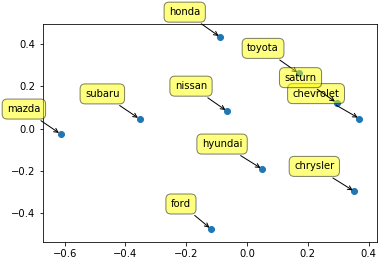

In [20]:
dissimilarity = 1/brandlift_df
dissimilarityarray = np.array(dissimilarity)
arraymax = np.amax(dissimilarityarray)
dissimilarityarray /= arraymax

mds = manifold.MDS(dissimilarity="precomputed", random_state = 10)
MDSResult = mds.fit(dissimilarityarray)
locations = MDSResult.embedding_

plt.scatter(locations[:, 0],locations[:, 1])

labels = my_list

for label, x, y in zip(labels, locations[:, 0],locations[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.show()

# Part B


See word document.

# Part C

In [21]:
attr_list = ["handling", 'performance','reliability', 'engine', 'power', 'mpg', 'space', 'efficiency', 'manual', 'sporty', 'reliable',
            'headroom','mileage', 'gas', 'powertrain', 'horsepower', 'quality']


def list_form(string):
    split_list = []
    split_list = string.split()
    return split_list
def get_attr(list):
    filtered_list = []
    for attr in list:
        if attr in attr_list:
            filtered_list.append(attr)
    string = " ".join(filtered_list)
    return string

def comb_words(string):
    if string == "mileage":
        string = "mpg"
    elif string == "gas":
        string = "mpg"
    return string


Results_df["Attributes"] = Results_df['ModelReplaced'].apply(list_form)
Results_df["Attributes"] = Results_df['Attributes'].apply(get_attr)
Results_df["Attributes"] = Results_df['Attributes'].apply(comb_words)
top_5_attr = pd.Series(" ".join(Results_df['Attributes']).split()).value_counts()[:5]
top_5_attr

engine     894
mpg        630
power      617
quality    364
manual     355
dtype: int64

In [22]:
mask = (Results_df['brands'] == 'honda')
honda_masked = Results_df.loc[mask, 'Attributes']
top_5_attr_honda = pd.Series(" ".join(honda_masked).split()).value_counts()[:5]
mask = (Results_df['brands'] == 'ford')
ford_masked = Results_df.loc[mask, 'Attributes']
top_5_attr_ford = pd.Series(" ".join(ford_masked).split()).value_counts()[:5]
mask = (Results_df['brands'] == 'toyota')
toyota_masked = Results_df.loc[mask, 'Attributes']
top_5_attr_toyota = pd.Series(" ".join(toyota_masked).split()).value_counts()[:5]
mask = (Results_df['brands'] == 'hyundai')
hyundai_masked = Results_df.loc[mask, 'Attributes']
top_5_attr_hyundai = pd.Series(" ".join(hyundai_masked).split()).value_counts()[:5]
mask = (Results_df['brands'] == 'nissan')
nissan_masked = Results_df.loc[mask, 'Attributes']
top_5_attr_nissan = pd.Series(" ".join(nissan_masked).split()).value_counts()[:5]

In [23]:
frames = [ford_masked, honda_masked, nissan_masked, hyundai_masked, toyota_masked]
result = pd.concat(frames)
top_5_attr_top5 = pd.Series(" ".join(result).split()).value_counts()[:5]
top_5_attr_top5

mpg        190
engine     148
power      123
quality     62
mileage     61
dtype: int64

In [28]:
mask = (Results_df['brands'] == 'bmw')
bmw_masked = Results_df.loc[mask, 'Attributes']
top_5_attr_bmw = pd.Series(" ".join(bmw_masked).split()).value_counts()[:5]
top_5_attr_bmw

performance    4
power          2
handling       2
engine         2
reliability    1
dtype: int64

# Part D

See word document.

# Part E

In [24]:
asp_list = ['want', 'desire', 'wish', 'need', 'crave', 'longing', 'thirst']


def list_form(string):
    split_list = []
    split_list = string.split()
    return split_list
def get_asp(list):
    filtered_list = []
    for asp in list:
        if asp in asp_list:
            filtered_list.append(asp)
    string = " ".join(filtered_list)
    return string

def comb_words(string):
    if string == "mileage":
        string = "mpg"
    elif string == "gas":
        string = "mpg"
    return string


Results_df["Desires"] = Results_df['ModelReplaced'].apply(list_form)
Results_df["Desires"] = Results_df['Desires'].apply(get_asp)
Results_df["Desires"] = Results_df['Desires'].apply(comb_words)
top_5_asp = pd.Series(" ".join(Results_df['Desires']).split()).value_counts()[:5]
top_5_asp

want      677
need      603
wish       86
desire     11
thirst      1
dtype: int64

In [25]:
mask = (Results_df['Desires'] == 'want')
want_masked = Results_df.loc[mask, 'brands']
top_5_attr_want = pd.Series(" ".join(want_masked).split()).value_counts()[:5]

mask = (Results_df['Desires'] == 'need')
need_masked = Results_df.loc[mask, 'brands']
top_5_attr_need = pd.Series(" ".join(need_masked).split()).value_counts()[:5]

mask = (Results_df['Desires'] == 'wish')
wish_masked = Results_df.loc[mask, 'brands']
top_5_attr_wish = pd.Series(" ".join(wish_masked).split()).value_counts()[:5]

mask = (Results_df['Desires'] == 'desire')
desire_masked = Results_df.loc[mask, 'brands']
top_5_attr_desire = pd.Series(" ".join(desire_masked).split()).value_counts()[:5]

mask = (Results_df['Desires'] == 'thirst')
thirst_masked = Results_df.loc[mask, 'brands']
top_5_attr_thirst = pd.Series(" ".join(thirst_masked).split()).value_counts()[:5]

In [26]:
frames = [want_masked, desire_masked, thirst_masked, wish_masked, need_masked]
asp_result = pd.concat(frames)
top_5_asp_brand = pd.Series(" ".join(asp_result).split()).value_counts()[:5]
top_5_asp_brand

honda      412
ford       242
toyota     209
hyundai    124
nissan     103
dtype: int64

This analysis shows that the honda is the most aspirational brand in the dataset, as it is most highly associated with words that show desire or aspiration. This was found by creating masks of the words related to desire that appeared most highly in the data, this was then used to create a subset of the brand counts that only used the messages that had aspirational words in, and then it was possible to count the prevalence of the brands. The business implications for honda is that they could potentially charge slightly more than the other brands in this set since people want their cars more than they tend to want the other car brands.